# Experiment #7: Introduction to Deep Learning with PyTorch
<b>Mohammed Abed Alkareem</b>
<b>1210708</b>

## 1.1 Tensors

In [85]:
import torch
import numpy as np

### Tensor Initialization

#### 1. Directly from data

In [86]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

#### 2. From a NumPy array

In [87]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

#### 3. From another tensor:

In [88]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides thedatatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.8655, 0.5993],
        [0.8014, 0.2991]]) 



#### 4. With random or constant values:

In [89]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2285, 0.4828, 0.4251],
        [0.8680, 0.7099, 0.7248]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Tensor Attributes

In [90]:
tensor = torch.rand(3, 4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

tensor

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


tensor([[0.8224, 0.3453, 0.1090, 0.6438],
        [0.1148, 0.4905, 0.7541, 0.9718],
        [0.9732, 0.9668, 0.2735, 0.3375]])

### Tensor Operations

In [91]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


#### 1. Standard numpy-like indexing and slicing:

In [92]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


#### 2. Joining tensors

In [93]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


#### 3. Multiplying tensors

In [94]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [95]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


#### 4. In-place operations

In [96]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


### Bridge with NumPy

#### Tensor to NumPy array: A change in the tensor reflects in the NumPy array.

In [97]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


#### NumPy array to Tensor: Changes in the NumPy array reflects in the tensor.

In [98]:
n = np.ones(5)
t = torch.from_numpy(n)
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## 1.2 A Gentle Introduction to torch.autograd

### Differentiation in Autograd

In [99]:
import torch
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)



In [100]:
## We create another tensor Q from a and b.
##              Q = 3a3 − b2

Q = 3*a**3 - b**2

Q

tensor([-12.,  65.], grad_fn=<SubBackward0>)

In [101]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [102]:
a.grad

tensor([36., 81.])

In [103]:
b.grad

tensor([-12.,  -8.])

In [104]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [105]:
## We create another tensor Q from a and b.
##              Q = 3a3 − ab2

Q = 3*a**3 - a*b**2
Q

tensor([-48.,  33.], grad_fn=<SubBackward0>)

In [106]:
external_grad = torch.tensor([1., 1.])  # 1*da/dQ + 1*db/dQ
Q.backward(gradient=external_grad)

In [107]:
a.grad

tensor([ 36., 146.])

In [108]:
b.grad

tensor([-36., -32.])

## 1.3    Building Models with PyTorch

In [109]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        # # 784 is the input dimension, and 68 is the output dimenstion ofthe first hidden layer
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        # apply the first layer with relu activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [112]:
params = list(net.parameters())

print(len(params))

for p in params:
    print(p.size())

6
torch.Size([64, 784])
torch.Size([64])
torch.Size([64, 64])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


#### Task 2:  
Identify what are the parameters that are printed in the previous code.

torch.Size([64, 784])

for layer 1 784 input , 64 output

torch.Size([64])
torch.Size([64, 64])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])

#### Random input

In [113]:
input = torch.randn(1, 784)
out = net(input)
print(out)

tensor([[-0.2069,  0.0045, -0.2658, -0.0035, -0.0382,  0.2218,  0.0735, -0.0101,
          0.1317,  0.1313]], grad_fn=<AddmmBackward0>)


#### Task 3:

#### Define a Loss function and optimizer

In [114]:
import torch.optim as optim

loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

#### Loading a Dataset

In [115]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.MNIST(root="data",
                               train=True,
                               download=True,
                               transform=ToTensor()
                               )

test_data = datasets.MNIST(root="data",
                           train=False,
                           download=True,
                           transform=ToTensor()
                           )

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



#### Iterating and Visualizing the Dataset

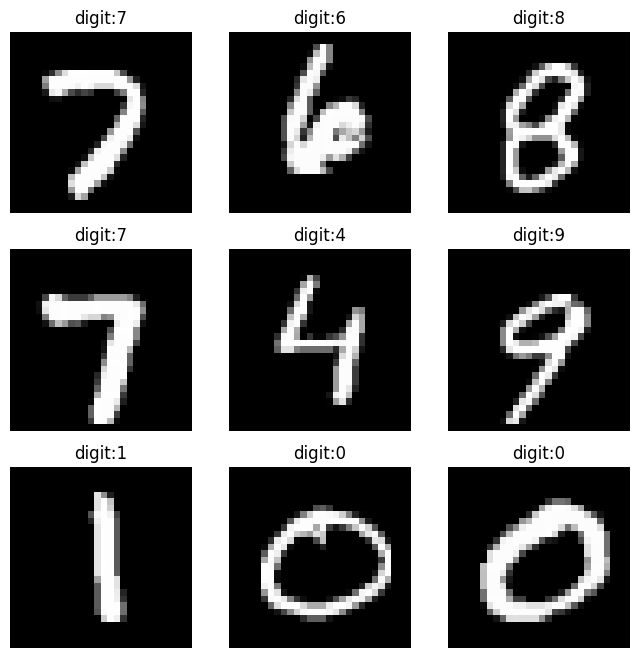

In [116]:
figure = plt.figure(figsize=(8, 8))

cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title("digit:" + str(label))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

#### Preparing your data for training with DataLoaders

In [117]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=4, shuffle=True)

#### Iterate through the DataLoader

Feature batch shape: torch.Size([4, 1, 28, 28])
Labels batch shape: torch.Size([4])


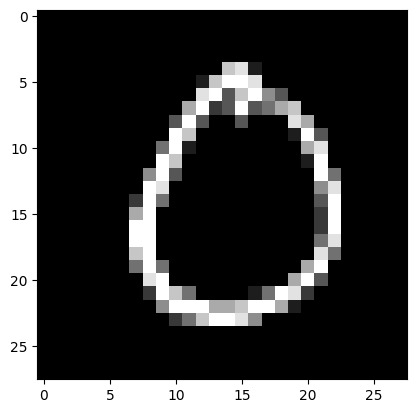

Label: 0


In [129]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

#### Train The Network

In [130]:
for epoch in range(2): 
    # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(torch.flatten(inputs,1))
        iteration_loss = loss(outputs, labels)
        iteration_loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += iteration_loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /2000:.3f}')
            running_loss = 0.0
            print('Finished Training')

[1,  2000] loss: 2.284
Finished Training
[1,  4000] loss: 2.192
Finished Training
[1,  6000] loss: 1.912
Finished Training
[1,  8000] loss: 1.405
Finished Training
[1, 10000] loss: 0.932
Finished Training
[1, 12000] loss: 0.726
Finished Training
[1, 14000] loss: 0.590
Finished Training
[2,  2000] loss: 0.501
Finished Training
[2,  4000] loss: 0.465
Finished Training
[2,  6000] loss: 0.448
Finished Training
[2,  8000] loss: 0.442
Finished Training
[2, 10000] loss: 0.397
Finished Training
[2, 12000] loss: 0.383
Finished Training
[2, 14000] loss: 0.361
Finished Training


#### save model

In [131]:
PATH ='./my_net.pth'
torch.save(net.state_dict(), PATH)

#### Test the network on the test data

In [132]:
net = Net()
net.load_state_dict(torch.load(PATH))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13796\238682776.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [135]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(torch.flatten(images,1))
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Accuracy of the network on the 10000 test images: 89 %
